In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('data_science_job.csv')
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14.0,NaN,NaN,42.0,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14.0,NaN,NaN,52.0,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,50-99,Pvt Ltd,44.0,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,0.0,500-999,Pvt Ltd,97.0,0.0


In [30]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [31]:
removable_col = [x for x in df.columns if df[x].isnull().mean() < 0.05 and df[x].isnull().mean() > 0]
removable_col

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [32]:
(len(df[removable_col].dropna()) / len(df))*100

89.68577095730244

In [33]:
new_df = df[removable_col].dropna()
new_df

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
4,0.767,no_enrollment,Masters,20.0,8.0
5,0.764,Part time course,Graduate,11.0,24.0
...,...,...,...,...,...
19153,0.878,no_enrollment,Graduate,14.0,42.0
19154,0.920,no_enrollment,Graduate,14.0,52.0
19155,0.920,no_enrollment,Graduate,20.0,44.0
19156,0.802,no_enrollment,High School,0.0,97.0


# Check Histogram and PDA for all numerical features (Overlap prev and new)

In [34]:
def checkHistAndPDA(cols,bin):
    for col in cols:
        fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(15,5))
        
        ax1 = fig.add_subplot(121)
        
        ax1.set_title(f"{col} Histogram")
        df[col].hist(bins=bin,ax=ax1,density=True,color="red")     
        new_df[col].hist(bins=bin,ax=ax1,density=True,color="green",alpha=0.8)
        
        ax2.set_title(f"{col} pdf")
        ax2 = fig.add_subplot(122)
        df[col].plot.density(color="red",ax=ax2)
        new_df[col].plot.density(color="green",ax=ax2)
        plt.show()

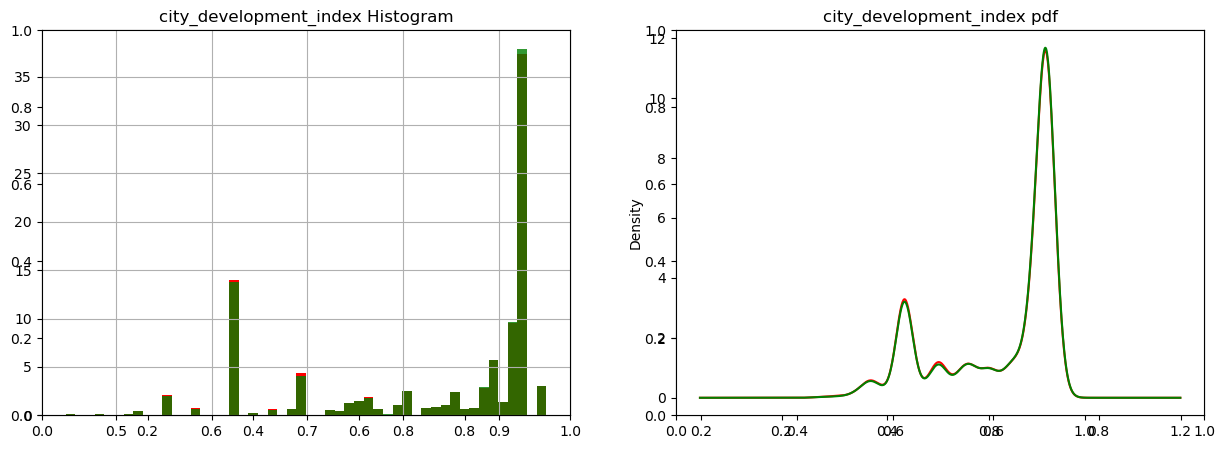

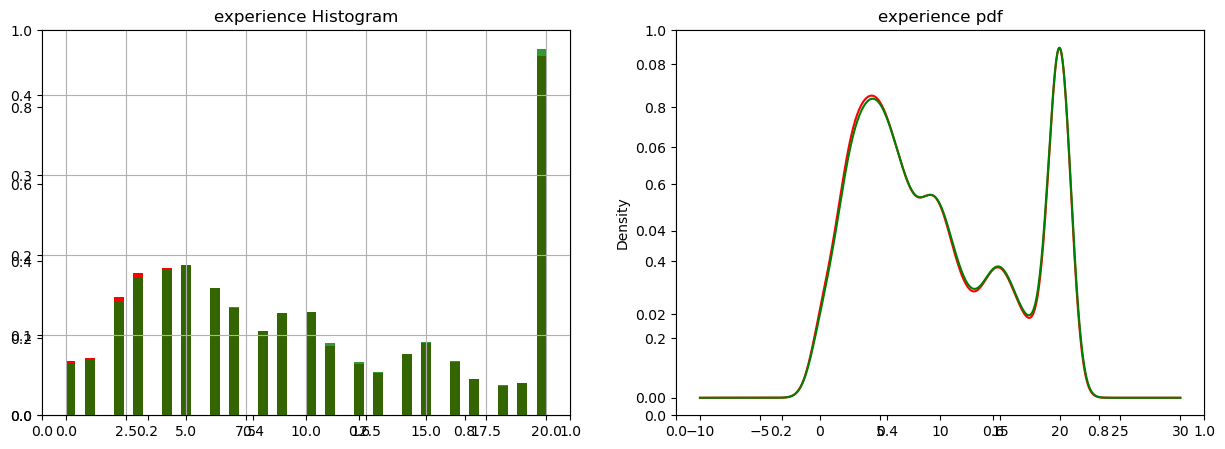

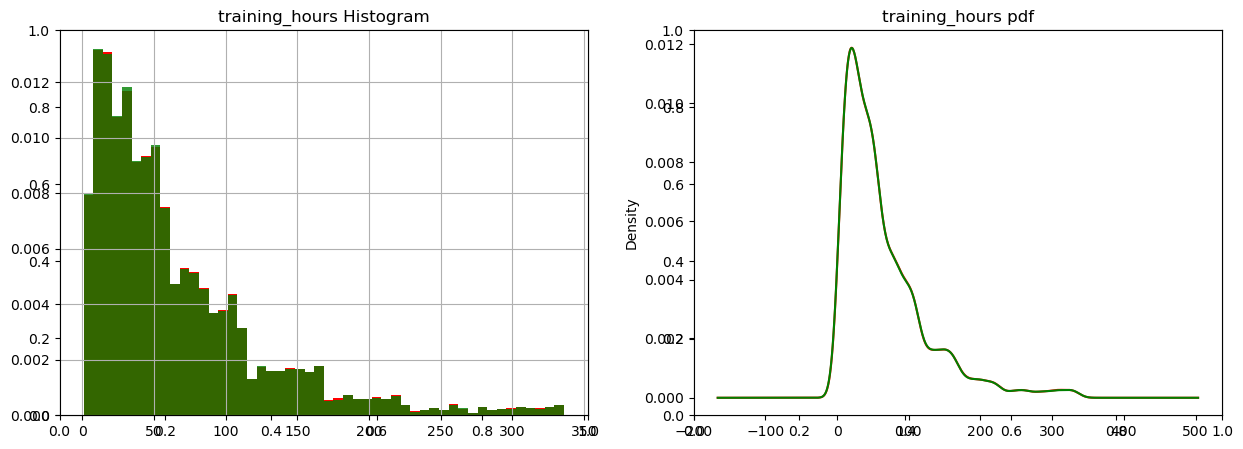

In [36]:
checkHistAndPDA(['city_development_index','experience','training_hours'],50)

# Check ratio for every value before and after for categorical data

In [37]:
df['enrolled_university'].value_counts()

enrolled_university
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: count, dtype: int64

In [40]:
temp = pd.concat([
    df['enrolled_university'].value_counts() / len(df),
    new_df['enrolled_university'].value_counts() / len(new_df)
    ],axis=1
)
temp.columns = ['Original','After']
temp

,Original,After
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [58]:
def checkRatioCatData(cols):
    for col in cols:
        temp = pd.concat([
            df[col].value_counts() / len(df),
            new_df[col].value_counts() / len(new_df)
            ],axis=1
        )   
        temp.columns = ['Original','After']
        print(temp)
        print()

In [59]:
checkRatioCatData(['enrolled_university','education_level'])

                     Original     After
enrolled_university                    
no_enrollment        0.721213  0.735188
Full time course     0.196106  0.200733
Part time course     0.062533  0.064079

                 Original     After
education_level                    
Graduate         0.605387  0.619835
Masters          0.227633  0.234082
High School      0.105282  0.107380
Phd              0.021610  0.022116
Primary School   0.016077  0.016587

